## Loading data and libraries

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [170]:
loc='C:/Users/deshw/Downloads/Datasets ML/sentiment-logistic-regression/sentiment_labelled_sentences/full_set.txt'
with open(loc) as file:
    data=file.readlines()

## Data wrangling

We must now clean the reviews of digits, punctuations, white spaces at the end and stop words.

In [171]:
x,y=[],[]
for line in data:
    line=line.strip()
    x.append(line.split('\t')[0])
    y.append(line.split('\t')[1])

In [172]:
punc=string.punctuation
digits=[str(i) for i in range(0,10)]
stop_words=['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']

In [173]:
def remover(arr,line):
    for item in arr:
        if item in line:
            line=line.replace(item,'')
    return line

In [241]:
punc_free=[remover(punc,line) for line in x]
digits_free=[remover(digits,line) for line in punc_free]
lower_case=[line.lower() for line in digits_free]
split=[line.split() for line in lower_case]
stop_free=[' '.join(list(filter(lambda x: x not in stop_words,line))) for line in split]

y=np.asanyarray(y,dtype='int')
y=2*y-1

## Bag of words

We can use the concept pf bag of words for converting the string values in out dataset into a matrix using CountVectorizer.

In [282]:
CV=CountVectorizer(analyzer='word',stop_words=None,max_features=4500)
X=CV.fit_transform(stop_free)
data_x=X.toarray()

## Splitting dataset 

In [283]:
test_ind1=np.random.choice(np.where(y==1)[0],size=400,replace=0)
test_ind2=np.random.choice(np.where(y==-1)[0],size=400,replace=0)
test_ind=np.append(test_ind1,test_ind2)
train_ind=list(set(np.arange(3000))-set(test_ind))

In [285]:
x_train=data_x[train_ind,]
y_train=y[train_ind]

x_test=data_x[test_ind,]
y_test=y[test_ind]

Implementing SVM with different values of C

In [407]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score
def evaluate(c=1):
    model=svm.LinearSVC(C=c,loss='hinge',max_iter=5000,dual=True)
    model.fit(x_train,y_train)
    y_hat_trn=model.predict(x_train)
    y_hat_tst=model.predict(x_test)
    error_trn=sum(np.not_equal(y_train,y_hat_trn))/len(y_train)
    error_tst=sum(np.not_equal(y_test,y_hat_tst))/len(y_train)
    return error_trn,error_tst

In [408]:
c=[0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]
error={}
for val in c:
    try:
        error[val]=evaluate(val)
    except:
        continue
error

C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{0.01: (0.21136363636363636, 0.095),
 0.1: (0.06772727272727273, 0.07181818181818182),
 1.0: (0.009545454545454546, 0.07),
 10.0: (0.0009090909090909091, 0.07772727272727273),
 100.0: (0.00045454545454545455, 0.08363636363636363),
 1000.0: (0.00045454545454545455, 0.08363636363636363),
 10000.0: (0.0009090909090909091, 0.08227272727272728)}

## Applying k-cross validation

In [421]:
def manual_cross(x,y,c=1.0,k=5):
    error=np.zeros(k)
    n=len(x)
    indices=np.random.permutation(n)
    for i in range(k):
        test_indices=indices[int(i*(n/k)):int((i+1)*(n/k))]
        train_indices=np.setdiff1d(indices,test_indices)
        x_train=x[train_indices]
        y_train=y[train_indices]
        x_test=x[test_indices]
        y_test=y[test_indices]
        
        model=svm.LinearSVC(C=c,loss='hinge')
        model.fit(x_train,y_train)
        
        y_hat_tst=model.predict(x_test)
        error[i]=sum(np.not_equal(y_test,y_hat_tst))/len(y_test)
    return np.mean(error)

### Choosing the correct value of C

In [428]:
def choose_parameter(x,y,k):
    c=[0.001,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]
    error=[]
    for value in c:
        error.append(manual_cross(x,y,c=val,k=k))
    return c, error

In [429]:
c, err = choose_parameter(data_x,y, 10)

C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\deshw\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

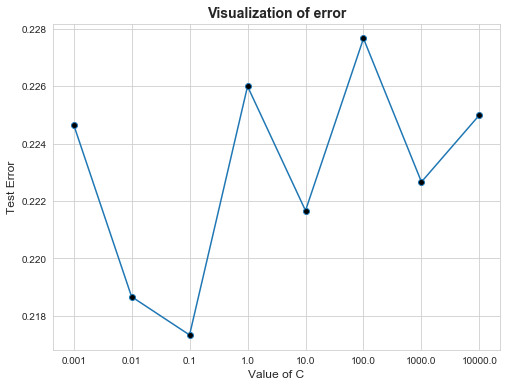

In [459]:
plt.figure(figsize=(8,6))
plt.plot([np.log(val) for val in c],err,marker='o',markerfacecolor='k')
plt.xticks([np.log(val) for val in c],labels=c)
plt.title("Visualization of error",fontsize=14,weight='bold')
plt.xlabel("Value of C",fontsize=12)
plt.ylabel("Test Error",fontsize=12)
plt.show()

In [460]:
ind=np.argmin(err)
C=c[ind]
clf = svm.LinearSVC(C=C, loss='hinge',max_iter=1000)
clf.fit(x_train, y_train)
y_hat_tst = clf.predict(x_test)
error = sum(np.not_equal(y_test,y_hat_tst))/len(y_test)
print("Test error: ", error)

Test error:  0.1975


1000.0

2000